## K-means 

K-means clustering is a popular unsupervised machine learning algorithm used for grouping similar data points into k - clusters. Goal: to partition a given dataset into k (predefined) clusters.

The k-means algorithm works by first randomly initializing k cluster centers, one for each cluster. Each data point in the dataset is then assigned to the nearest cluster center based on their distance. The distance metric used is typically Euclidean distance, but other distance measures such as Manhattan distance or cosine similarity can also be used.

After all the data points have been assigned to a cluster, the algorithm calculates the new mean for each cluster by taking the average of all the data points assigned to that cluster. These new means become the new cluster centers. The algorithm then repeats the assignment and mean calculation steps until the cluster assignments no longer change or until a maximum number of iterations is reached.

The final output of the k-means algorithm is a set of k clusters, where each cluster contains the data points that are most similar to each other based on the distance metric used. The algorithm is commonly used in various fields such as image segmentation, market segmentation, and customer profiling.


```
Initialize:
- K: number of clusters
- Data: the input dataset
- Randomly select K initial centroids

Repeat:
- Assign each data point to the nearest centroid (based on Euclidean distance)
- Calculate the mean of each cluster to update its centroid
- Check if the centroids have converged (i.e., they no longer change)

Until:
- The centroids have converged
- The maximum number of iterations has been reached

Output:
- The final K clusters and their corresponding centroids
```


## Code 
Here's an implementation of k-means clustering algorithm in Python from scratch:

In [6]:
import numpy as np  # 导入numpy库，用于数值计算 / Import numpy library for numerical computations

class KMeans:
    """
    K-means聚类算法实现 / K-means clustering algorithm implementation
    无监督学习算法，用于将数据点分组到k个簇中 / Unsupervised learning algorithm for grouping data points into k clusters
    """
    
    def __init__(self, k, max_iterations=100):
        """
        初始化K-means算法参数 / Initialize K-means algorithm parameters
        
        参数 / Parameters:
        ----------
        k : int
            聚类数量，即要分成的簇的个数 / Number of clusters to form
            例如：k=3表示将数据分为3个簇 / For example: k=3 means dividing data into 3 clusters
            
        max_iterations : int, default=100
            最大迭代次数，防止算法无限循环 / Maximum number of iterations to prevent infinite loops
            当算法收敛时会提前停止 / Algorithm will stop early when converged
            建议值：50-200，根据数据复杂度调整 / Recommended: 50-200, adjust based on data complexity
        """
        self.k = k  # 存储聚类数量 / Store the number of clusters
        self.max_iterations = max_iterations  # 存储最大迭代次数 / Store maximum iterations
        
    def fit(self, X):
        """
        训练K-means模型 / Train the K-means model
        
        参数 / Parameters:
        ----------
        X : array-like, shape (n_samples, n_features)
            训练数据，每行是一个数据点，每列是一个特征 / Training data, each row is a data point, each column is a feature
            例如：1000个样本，每个样本有20个特征 / For example: 1000 samples with 20 features each
        """
        # 随机初始化聚类中心点 / Randomly initialize cluster centroids
        # 从数据集中随机选择k个点作为初始中心 / Randomly select k points from dataset as initial centroids
        self.centroids = X[np.random.choice(range(len(X)), self.k, replace=False)]
        previous_centroids = None  # 存储上一次的中心点，用于收敛检查 / Store previous centroids for convergence check
        
        # 开始迭代优化 / Start iterative optimization
        for i in range(self.max_iterations):
            # 步骤1：将每个数据点分配到最近的中心点 / Step 1: Assign each data point to nearest centroid
            cluster_assignments = []  # 存储每个数据点的簇分配 / Store cluster assignment for each data point
            
            # 遍历每个数据点 / Iterate through each data point
            for j in range(len(X)):
                # 计算当前数据点到所有中心点的欧几里得距离 / Calculate Euclidean distance from current point to all centroids
                distances = np.linalg.norm(X[j] - self.centroids, axis=1)
                # 找到最近的中心点索引 / Find the index of nearest centroid
                cluster_assignments.append(np.argmin(distances))
            
            # 步骤2：更新每个簇的中心点 / Step 2: Update centroids for each cluster
            for cluster_idx in range(self.k):  # 遍历每个簇 / Iterate through each cluster
                # 找到属于当前簇的所有数据点 / Find all data points belonging to current cluster
                cluster_data_points = X[np.where(np.array(cluster_assignments) == cluster_idx)]
                
                # 检查簇是否为空 / Check if cluster is empty
                if len(cluster_data_points) > 0:
                    # 计算簇内所有点的平均值作为新的中心点 / Calculate mean of all points in cluster as new centroid
                    self.centroids[cluster_idx] = np.mean(cluster_data_points, axis=0)
                # 如果簇为空，保持原中心点不变 / If cluster is empty, keep original centroid unchanged
            
            # 步骤3：检查算法是否收敛 / Step 3: Check if algorithm has converged
            # 比较当前中心点与上一次的中心点是否相同 / Compare current centroids with previous centroids
            if i > 0 and previous_centroids is not None and np.array_equal(self.centroids, previous_centroids):
                break  # 如果中心点不再变化，算法收敛，提前退出 / If centroids don't change, algorithm converged, exit early
            
            # 保存当前中心点作为下一次迭代的"上一次"中心点 / Save current centroids as "previous" for next iteration
            previous_centroids = np.copy(self.centroids)
        
        # 保存最终的簇分配结果 / Store final cluster assignments
        self.cluster_assignments = cluster_assignments
    
    def predict(self, X):
        """
        对新数据进行聚类预测 / Predict cluster assignments for new data
        
        参数 / Parameters:
        ----------
        X : array-like, shape (n_samples, n_features)
            要预测的数据点 / Data points to predict
            形状与训练数据相同 / Same shape as training data
            
        返回 / Returns:
        -------
        cluster_assignments : list
            每个数据点的簇分配 / Cluster assignment for each data point
            例如：[0, 1, 0, 2, 1] 表示第1个点属于簇0，第2个点属于簇1 / For example: [0, 1, 0, 2, 1] means point 1 belongs to cluster 0, point 2 belongs to cluster 1
        """
        # 将每个数据点分配到最近的中心点 / Assign each data point to nearest centroid
        cluster_assignments = []  # 存储预测结果 / Store prediction results
        
        # 遍历每个要预测的数据点 / Iterate through each data point to predict
        for j in range(len(X)):
            # 计算当前点到所有训练好的中心点的距离 / Calculate distance from current point to all trained centroids
            distances = np.linalg.norm(X[j] - self.centroids, axis=1)
            # 找到最近的中心点并分配簇标签 / Find nearest centroid and assign cluster label
            cluster_assignments.append(np.argmin(distances))
        
        return cluster_assignments  # 返回簇分配结果 / Return cluster assignments

The KMeans class has an __init__ method that takes the number of clusters (k) and the maximum number of iterations to run (max_iterations). The fit method takes the input dataset (X) and runs the k-means clustering algorithm. The predict method takes a new dataset (X) and returns the cluster assignments for each data point based on the centroids learned during training.

Note that this implementation assumes that the input dataset X is a NumPy array with each row representing a single data point and each column representing a feature. The algorithm also uses Euclidean distance to calculate the distances between data points and centroids.


### Test 

In [7]:

# 创建测试数据集 / Create test dataset
# 生成两个分离的簇，用于测试K-means算法 / Generate two separated clusters for testing K-means algorithm

# 创建第一个簇：5个点，中心在(5,5)附近 / Create first cluster: 5 points, centered around (5,5)
x1 = np.random.randn(5,2) + 5  # 生成5个2维点，添加偏移量5 / Generate 5 2D points, add offset 5

# 创建第二个簇：5个点，中心在(-5,-5)附近 / Create second cluster: 5 points, centered around (-5,-5)  
x2 = np.random.randn(5,2) - 5  # 生成5个2维点，添加偏移量-5 / Generate 5 2D points, add offset -5

# 将两个簇合并成一个数据集 / Combine two clusters into one dataset
X = np.concatenate([x1,x2], axis=0)  # 垂直拼接，得到10个点的数据集 / Vertically concatenate to get 10-point dataset

# 初始化K-means对象，设置k=2（期望分成2个簇）/ Initialize K-means object with k=2 (expect 2 clusters)
kmeans = KMeans(k=2)  # 创建K-means实例，指定聚类数量为2 / Create K-means instance with 2 clusters

# 训练K-means模型 / Train the K-means model
kmeans.fit(X)  # 使用数据集X训练模型 / Train model using dataset X

# 获取训练数据的簇分配结果 / Get cluster assignments for training data
cluster_assignments = kmeans.predict(X)  # 预测每个点属于哪个簇 / Predict which cluster each point belongs to

# 打印簇分配结果 / Print cluster assignments
print(cluster_assignments)  # 输出：[0,0,0,0,0,1,1,1,1,1] 表示前5个点属于簇0，后5个点属于簇1 / Output: [0,0,0,0,0,1,1,1,1,1] means first 5 points belong to cluster 0, last 5 to cluster 1

# 打印学习到的中心点坐标 / Print learned centroid coordinates
print(kmeans.centroids)  # 输出两个中心点的坐标 / Output coordinates of two centroids

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[[ 4.58164781  4.43505443]
 [-5.18409633 -5.34275196]]


### Visualize

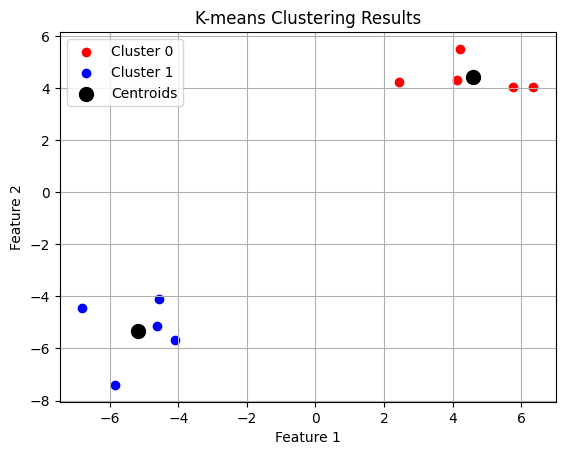

In [8]:
# 导入matplotlib库用于数据可视化 / Import matplotlib library for data visualization
from matplotlib import pyplot as plt

# 绘制聚类结果的可视化图表 / Create visualization plot for clustering results
# 根据簇分配结果用不同颜色绘制数据点 / Plot data points with different colors based on cluster assignments

# 定义颜色列表，用于区分不同的簇 / Define color list to distinguish different clusters
colors = ['r', 'b']  # 红色表示簇0，蓝色表示簇1 / Red for cluster 0, blue for cluster 1

# 遍历每个簇，绘制属于该簇的所有数据点 / Iterate through each cluster, plot all data points belonging to that cluster
for i in range(kmeans.k):  # 遍历所有簇（k=2）/ Iterate through all clusters (k=2)
    # 找到属于当前簇i的所有数据点 / Find all data points belonging to current cluster i
    cluster_points = X[np.where(np.array(cluster_assignments) == i)]
    
    # 绘制当前簇的数据点 / Plot data points of current cluster
    plt.scatter(cluster_points[:,0],  # x坐标：第一个特征 / x-coordinate: first feature
                cluster_points[:,1],  # y坐标：第二个特征 / y-coordinate: second feature
                color=colors[i],      # 使用预定义的颜色 / Use predefined color
                label=f'Cluster {i}') # 添加图例标签 / Add legend label

# 绘制聚类中心点 / Plot cluster centroids
plt.scatter(kmeans.centroids[:,0],    # 中心点的x坐标 / x-coordinates of centroids
            kmeans.centroids[:,1],    # 中心点的y坐标 / y-coordinates of centroids
            color='black',            # 黑色表示中心点 / Black color for centroids
            marker='o',               # 圆形标记 / Circle marker
            s=100,                    # 标记大小 / Marker size
            label='Centroids')        # 图例标签 / Legend label

# 添加图表标题和标签 / Add plot title and labels
plt.title('K-means Clustering Results')  # 图表标题 / Plot title
plt.xlabel('Feature 1')                 # x轴标签 / x-axis label
plt.ylabel('Feature 2')                  # y轴标签 / y-axis label
plt.legend()                            # 显示图例 / Show legend
plt.grid(True)                          # 显示网格 / Show grid

# 显示图表 / Display the plot
plt.show()

### Optimization 
Here are some ways to optimize the k-means clustering algorithm:

Random initialization of centroids: Instead of initializing the centroids using the first k data points, we can randomly initialize them to improve the convergence of the algorithm. This can be done by selecting k random data points from the input dataset as the initial centroids.

Early stopping: We can stop the k-means algorithm if the cluster assignments and centroids do not change after a certain number of iterations. This helps to avoid unnecessary computation.

Vectorization: We can use numpy arrays and vectorized operations to speed up the computation. This avoids the need for loops and makes the code more efficient.

Here's an optimized version of the k-means clustering algorithm that implements these optimizations:

In [9]:
import numpy as np  # 导入numpy库，用于向量化计算 / Import numpy library for vectorized computations

class KMeans:
    """
    K-means聚类算法优化版本 / Optimized K-means clustering algorithm
    使用向量化操作提高性能 / Uses vectorized operations for better performance
    """
    
    def __init__(self, k=3, max_iters=100, tol=1e-4):
        """
        初始化优化版K-means算法参数 / Initialize optimized K-means algorithm parameters
        
        参数 / Parameters:
        ----------
        k : int, default=3
            聚类数量 / Number of clusters
            默认值3，可根据数据调整 / Default 3, adjust based on data
            
        max_iters : int, default=100
            最大迭代次数 / Maximum number of iterations
            防止算法无限循环 / Prevent infinite loops
            
        tol : float, default=1e-4
            收敛容差 / Convergence tolerance
            当中心点变化小于此值时认为收敛 / Algorithm converges when centroid change < this value
            1e-4 = 0.0001，表示很小的变化 / 1e-4 = 0.0001, represents very small change
        """
        self.k = k                    # 存储聚类数量 / Store number of clusters
        self.max_iters = max_iters    # 存储最大迭代次数 / Store maximum iterations
        self.tol = tol               # 存储收敛容差 / Store convergence tolerance
    
    def fit(self, X):
        """
        训练优化版K-means模型 / Train optimized K-means model
        
        参数 / Parameters:
        ----------
        X : array-like, shape (n_samples, n_features)
            训练数据 / Training data
            使用向量化操作，性能更好 / Uses vectorized operations for better performance
        """
        # 随机初始化聚类中心点 / Randomly initialize cluster centroids
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]
        
        # 开始迭代优化 / Start iterative optimization
        for i in range(self.max_iters):
            # 向量化计算：计算所有数据点到所有中心点的距离 / Vectorized computation: calculate distances from all points to all centroids
            # X[:, np.newaxis] 将X从(n_samples, n_features)扩展为(n_samples, 1, n_features) / Expand X from (n_samples, n_features) to (n_samples, 1, n_features)
            # self.centroids 形状为(k, n_features) / self.centroids shape is (k, n_features)
            # 广播机制自动计算所有组合的距离 / Broadcasting automatically calculates distances for all combinations
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            
            # 找到每个数据点的最近中心点 / Find nearest centroid for each data point
            cluster_assignments = np.argmin(distances, axis=1)  # 返回最近中心点的索引 / Return indices of nearest centroids
            
            # 向量化更新中心点 / Vectorized centroid update
            new_centroids = np.array([np.mean(X[np.where(cluster_assignments == j)], axis=0) 
                                      for j in range(self.k)])
            
            # 检查收敛：计算新旧中心点的欧几里得距离 / Check convergence: calculate Euclidean distance between old and new centroids
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break  # 如果变化小于容差，算法收敛 / If change is less than tolerance, algorithm converged
                
            self.centroids = new_centroids  # 更新中心点 / Update centroids
    
    def predict(self, X):
        """
        对新数据进行聚类预测（优化版）/ Predict cluster assignments for new data (optimized)
        
        参数 / Parameters:
        ----------
        X : array-like, shape (n_samples, n_features)
            要预测的数据点 / Data points to predict
            
        返回 / Returns:
        -------
        cluster_assignments : array
            每个数据点的簇分配 / Cluster assignment for each data point
            使用向量化操作，性能更好 / Uses vectorized operations for better performance
        """
        # 向量化计算距离 / Vectorized distance calculation
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        
        # 向量化分配簇标签 / Vectorized cluster assignment
        cluster_assignments = np.argmin(distances, axis=1)
        
        return cluster_assignments  # 返回簇分配结果 / Return cluster assignments


This optimized version initializes the centroids randomly, uses vectorized operations for computing distances and updating the centroids, and checks for convergence after each iteration to stop the algorithm if it has converged.

Follow ups:

* Computattional complexity: O(it * knd)
* Improve space: use index instead of copy
* Improve time: 
  * dim reduction
  * subsample (cons?)
* mini-batch
* k-median https://mmuratarat.github.io/2019-07-23/kmeans_from_scratch